# Statistics for Project

In [1]:
# Imported packages
import numpy as np
import statistics
from statistics import stdev 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from numpy import array
from numpy import cov
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
data_orig = pd.read_csv('Capstone_Data_Edit.csv')
#data = data_orig.drop(['Year'], axis=1)
data = data_orig

#change Date into DateTime data type and make it index
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
#double check in .info() that change was made--change made
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)


data.head(5)

,Month,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,2012,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",...,66.86,67.19,66.36,66.40,"5,348,800",33.50,33.69,32.93,32.98,"1,854,500"
2012-01-04,January,2012,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",...,66.41,66.84,66.12,66.74,"6,042,400",33.00,33.18,32.66,32.73,"1,721,200"
2012-01-05,January,2012,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",...,66.58,66.67,66.12,66.22,"4,909,100",32.69,32.73,31.80,31.81,"4,621,400"
2012-01-06,January,2012,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",...,66.27,66.27,65.29,65.39,"6,533,000",31.75,31.83,31.22,31.45,"4,981,500"
2012-01-09,January,2012,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",...,65.26,65.83,65.01,65.73,"5,859,600",31.53,31.91,31.50,31.83,"1,759,800"


### Create new columns of means

- volatility for a stock is a numerical representation of that stock's risk; the technical term for volatility is standard deviation
- use volatility to compare to temp_anamoly

### Sample project
- https://www.datacamp.com/community/tutorials/stocks-significance-testing-p-hacking
- convert our raw closing prices into daily % returns
- use the pandas method 'pct_change()' to calculate the daily percentage change directly.

## Calculations from stock features

### Return
- return = (p/p-1)-1
- measure of a company's profitability
- profit/loss made by the stock 

In [3]:
#create new dataset with only close cost of stocks
#stock_close = data[['CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]

In [37]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#calculate return for stocks
#return = (p/p-1)-1

data['CORN_return'] = data['CORN_Close'].pct_change(1)
data['WEAT_return'] = data['WEAT_Close'].pct_change(1)
data['CANE_return'] = data['CANE_Close'].pct_change(1)
data['HSY_return'] = data['HSY_Close'].pct_change(1)
data['SJM_return'] = data['SJM_Close'].pct_change(1)
data['GIS_return'] = data['GIS_Close'].pct_change(1)
data['PEP_return'] = data['PEP_Close'].pct_change(1)
data['CPB_return'] = data['CPB_Close'].pct_change(1)

#backward fill for the NaN created from first row
#data['CORN_return'].fillna(method='bfill')

data.head(5)

,Month,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,...,CPB_UpperBand,CPB_LowerBand,CORN_return,WEAT_return,CANE_return,HSY_return,SJM_return,GIS_return,PEP_return,CPB_return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,2012,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,January,2012,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",...,NaN,NaN,-0.002581,-0.011576,0.021840,0.002139,-0.000259,0.005955,0.005120,-0.007580
2012-01-05,January,2012,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",...,NaN,NaN,-0.023524,-0.021171,-0.061241,-0.001477,0.005176,0.004440,-0.007791,-0.028109
2012-01-06,January,2012,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",...,NaN,NaN,-0.003854,-0.006903,0.000438,-0.002301,-0.003347,-0.015963,-0.012534,-0.011317
2012-01-09,January,2012,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",...,NaN,NaN,0.020314,0.013438,0.006565,0.004449,0.006975,-0.001747,0.005200,0.012083


Text(0.5,1,'Correlation Heatmap')

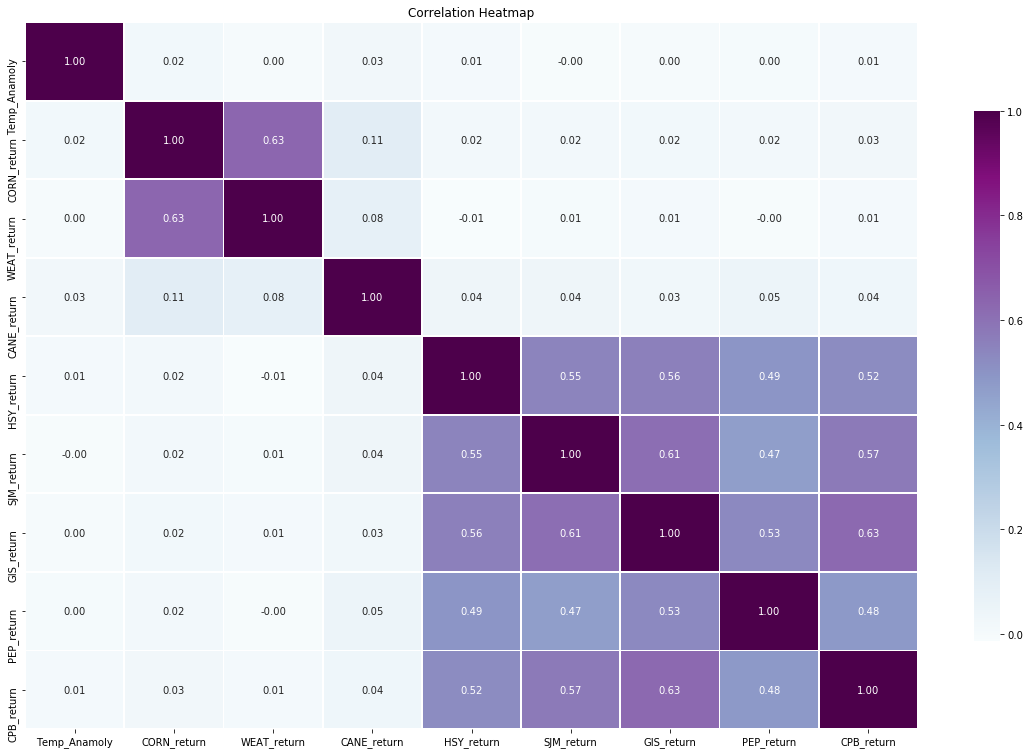

In [5]:
#looking at correlation between return values in stocks
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#no correlation of Temp_Anamoly and stock return

stock_per_change = data[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')

### Cumulative Daily Returns
- Cumulative return is the return computed relative to the day investment
- If the cumulative return is above one-make a profit

In [39]:
#cumulative daily returns
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#Cumulative return is computed relative to the day investment. 
#If the cumulative return is above one-make a profit--anything else is a loss

data['CORN_cum_return'] = (1 + data['CORN_return']).cumprod()
data['WEAT_cum_return'] = (1 + data['WEAT_return']).cumprod()
data['CANE_cum_return'] = (1 + data['CANE_return']).cumprod()
data['HSY_cum_return'] = (1 + data['HSY_return']).cumprod()
data['SJM_cum_return'] = (1 + data['SJM_return']).cumprod()
data['GIS_cum_return'] = (1 + data['GIS_return']).cumprod()
data['PEP_cum_return'] = (1 + data['PEP_return']).cumprod()
data['CPB_cum_return'] = (1 + data['CPB_return']).cumprod()

data.head(5)

,Month,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,...,PEP_return,CPB_return,CORN_cum_return,WEAT_cum_return,CANE_cum_return,HSY_cum_return,SJM_cum_return,GIS_cum_return,PEP_cum_return,CPB_cum_return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,2012,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,January,2012,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",...,0.005120,-0.007580,0.997419,0.988424,1.021840,1.002139,0.999741,1.005955,1.005120,0.992420
2012-01-05,January,2012,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",...,-0.007791,-0.028109,0.973956,0.967498,0.959261,1.000658,1.004916,1.010422,0.997289,0.964524
2012-01-06,January,2012,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",...,-0.012534,-0.011317,0.970202,0.960819,0.959681,0.998355,1.001552,0.994293,0.984789,0.953608
2012-01-09,January,2012,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",...,0.005200,0.012083,0.989911,0.973731,0.965981,1.002797,1.008538,0.992556,0.989910,0.965130


In [7]:
#fill the NaNs created
#my_series.fillna(method='bfill')

Text(0.5,1,'Correlation Heatmap')

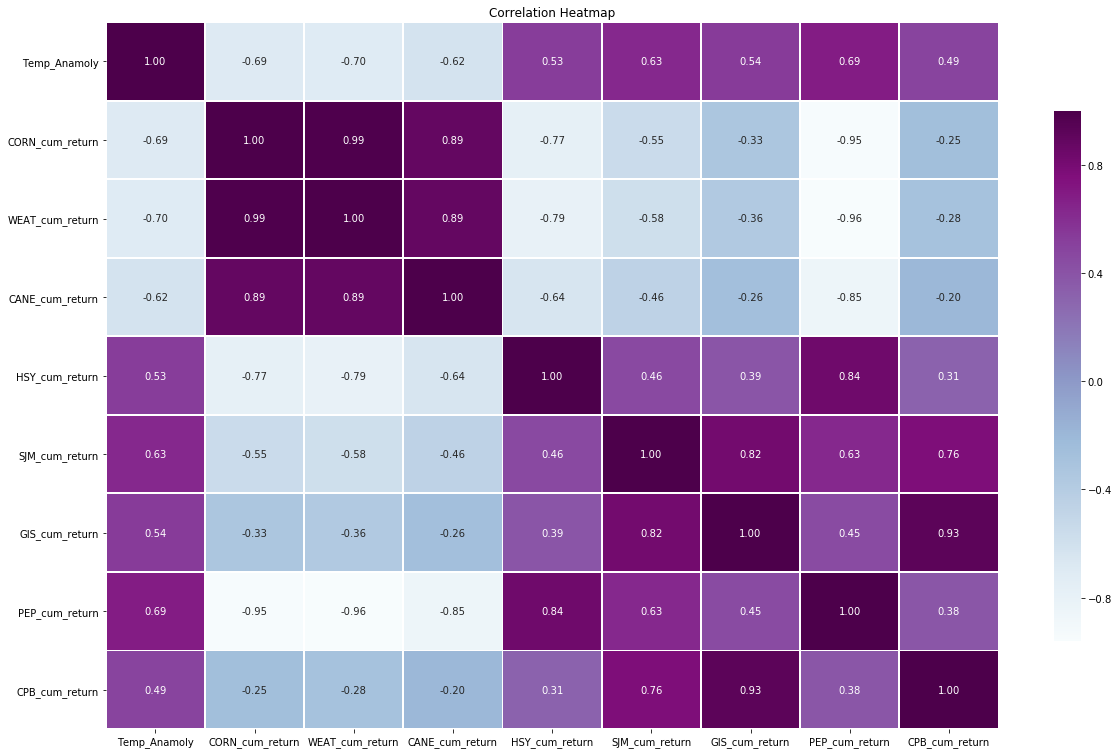

In [8]:
#Correlation with cumulative return
#moderate correlation of Temp_Anamoly with stock cumulative return
#negative for commodity stock
#positive for company stock

stock_per_change = data[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')

### Covariance
- https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/
- Measure of the joint probability for two random variables--describes how two variables change together
- The sign of the covariance can be interpreted as whether the two variables increase together (positive) or decrease together (negative). 
- **A covariance value of zero indicates that both variables are completely independent**

In [9]:
#finding the covariance for all stock close features
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['Temp_Anamoly'])
b = array(data['CORN_Close'])
c = array(data['WEAT_Close'])
d = array(data['CANE_Close'])
e = array(data['HSY_Close'])
f = array(data['SJM_Close'])
g = array(data['GIS_Close'])
h = array(data['PEP_Close'])
i = array(data['CPB_Close'])

covariance1 = cov(a,b)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance1)
covariance2 = cov(a,c)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance2)
covariance3 = cov(a,d)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance3)
covariance4 = cov(a,e)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance4)
covariance5 = cov(a,f)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance5)
covariance6 = cov(a,g)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance6)
covariance7 = cov(a,h)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance7)
covariance8 = cov(a,i)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance8)

Covariance of Temp_Anamoly and CORN_Close -1.1382527258379114
Covariance of Temp_Anamoly and WEAT_Close -0.6546277128131264
Covariance of Temp_Anamoly and CANE_Close -0.4485527336231245
Covariance of Temp_Anamoly and HSY_Close 1.5061099678903205
Covariance of Temp_Anamoly and SJM_Close 1.7314035378232842
Covariance of Temp_Anamoly and GIS_Close 0.6620507651258039
Covariance of Temp_Anamoly and PEP_Close 1.9498699793284042
Covariance of Temp_Anamoly and CPB_Close 0.7743363558331763


### Granger Causality
- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
- used to determine if one time series will be useful to forecast another

[Reading the test:](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
- The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. 
- If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

[Test Explained:](https://www.youtube.com/watch?v=ZUv7T8iPGrc)
- y is a function of the lag of x, not x itself

### Null hyp: Stock_Close does not granger cause Temp Anamoly (Stock_Close is not Granger supported by Temp Anamoly)
- temp_Anamoly is a predictive factor
- reject null for CORN, WEAT, CANE, and PEP: Stock_Close is granger supported by Temp_Anamoly

In [4]:
#odd result: could this be that the commodity picing is inherently pretictive on past trends in climate?
print('CORN_Close',grangercausalitytests(data[['Temp_Anamoly','CORN_Close']], maxlag=1)) #reject NULL
print('WEAT_Close',grangercausalitytests(data[['Temp_Anamoly','WEAT_Close']], maxlag=1)) #reject NULL
print('CANE_Close',grangercausalitytests(data[['Temp_Anamoly','CANE_Close']], maxlag=1)) #reject NULL
print('HSY_Close',grangercausalitytests(data[['Temp_Anamoly','HSY_Close']], maxlag=1)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data[['Temp_Anamoly','SJM_Close']], maxlag=1)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data[['Temp_Anamoly','GIS_Close']], maxlag=1)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data[['Temp_Anamoly','PEP_Close']], maxlag=1)) #reject NULL
print('CPB_Close',grangercausalitytests(data[['Temp_Anamoly','CPB_Close']], maxlag=1)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
CORN_Close {1: ({'ssr_ftest': (6.975343399559502, 0.008328112039942067, 2008.0, 1), 'ssr_chi2test': (6.98576472933972, 0.008216054030539493, 1), 'lrtest': (6.973659262694127, 0.008271817340070172, 1), 'params_ftest': (6.975343399579382, 0.008328112039850264, 2008.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f850032d240>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f850032de80>, array([[0., 1., 0.]])])}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6656  , p=0.0099  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.6755  , p=0.0098  , df=1
likelihood ratio test: chi2=6.6645  , p=0.0

### Null hyp: Temp_Anamoly does not granger cause Stock_Close (Temp_Anamoly is not granger supported by Stock_Close)
- accept null in all cases

In [24]:
print('CORN_Close',grangercausalitytests(data[['CORN_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('WEAT_Close',grangercausalitytests(data[['WEAT_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('CANE_Close',grangercausalitytests(data[['CANE_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('HSY_Close',grangercausalitytests(data[['HSY_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data[['SJM_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data[['GIS_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data[['PEP_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('CPB_Close',grangercausalitytests(data[['CPB_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3508  , p=0.5537  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.3513  , p=0.5534  , df=1
likelihood ratio test: chi2=0.3513  , p=0.5534  , df=1
parameter F test:         F=0.3508  , p=0.5537  , df_denom=2008, df_num=1
CORN_Close {1: ({'ssr_ftest': (0.35078628163604325, 0.5537350553023714, 2008.0, 1), 'ssr_chi2test': (0.35131036472613697, 0.5533723000624989, 1), 'lrtest': (0.3512796823310964, 0.5533896253551511, 1), 'params_ftest': (0.35078628163672065, 0.5537350553019935, 2008.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fdb84750588>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fdb7f92d0f0>, array([[0., 1., 0.]])])}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8802  , p=0.3483  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.8815  , p=0.3478  , df=1
likelihood ratio test: chi2=0.8813  , p=0.3

### Volatility
- can be measured with regards to standard deviation
- using standard deviation, ways to incorporate stdev in investigating volaility: Bollinger Bands, Maximum Drawdown, 

**Standard Deviation**
- use for looking at stock volatility: the stdev indicates how tightly the price of a stock is clustered around the mean or moving average
- [Stock Volatility](https://www.investopedia.com/ask/answers/021015/what-best-measure-given-stocks-volatility.asp): reflection of the degree to which price moves
    - stock with price that fluctuates wildly, hits new highs and lows, or moves erratically is considered highly volatile
    - stock that maintains a relatively stable price has low volatility
    - Larger standard deviations point to higher dispersions of returns as well as greater investment risk
    
- [When you hear that volatility of a stock increased from 20% to 30%, you have no idea whether the stock price actually went up or down. You can just conclude that its moves got bigger and more variable](https://www.macroption.com/price-volatility/)
- when looking at 

**Factors Effecting Volatility**
- major weather event in area where commodity is produced
- large fluctuations in pricing does not necessarily mean decrease in stock
    - When volatility is high, both in terms of the broad market and in relative terms for a specific stock, traders who are bearish on the stock may buy puts on it based on the twin premises of “buy high, sell higher,” and “the trend is your friend.”

[**Bollinger Bands**](https://www.investopedia.com/terms/b/bollingerbands.asp)
- technical indicator to analyze standard deviation over time
- comprised of three lines: the simple moving average (SMA) and two bands placed one standard deviation above and below the SMA
    - SMA is smoothed out version of the stock's price history: slower to respond to changes
- outer bands mirror those changes to reflect the corresponding adjustment to the standard deviation 
- The standard deviation is shown by the width of the Bollinger Bands
    - The wider the Bollinger Bands, the more volatile a stock's price within the given period. 
    - A stock with low volatility has very narrow Bollinger Bands that sit close to the SMA.
    
- [setting up Bollinger Bands](https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300)

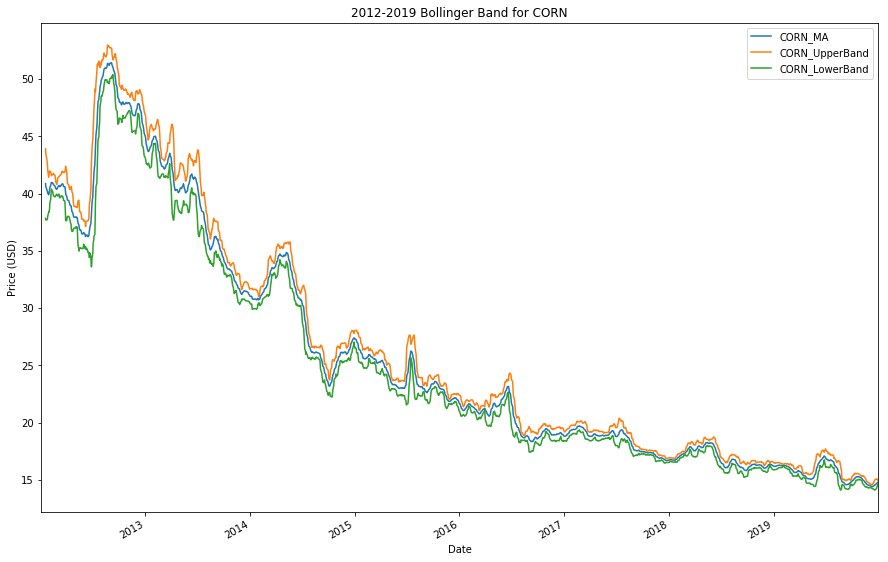

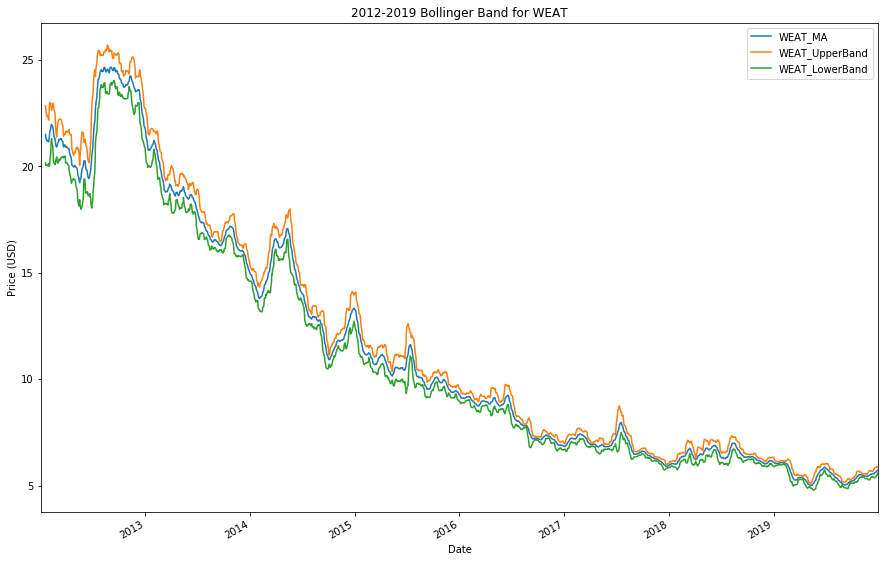

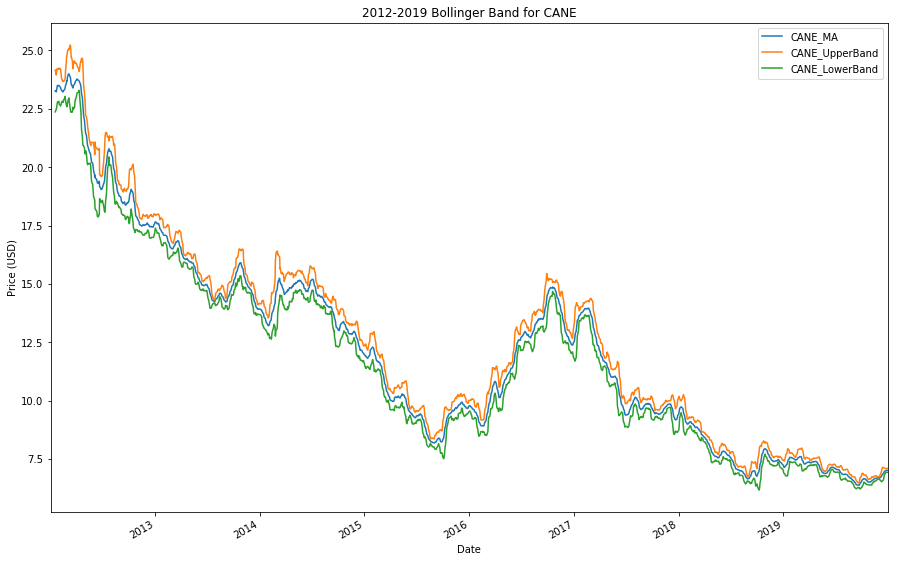

In [32]:
#source: https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300

#set moving average for CORN_Close--LOW VOLATILITY
data['CORN_MA'] = data['CORN_Close'].rolling(12).mean()
#set standard deviation for sample
data['CORN_STD'] = data['CORN_Close'].rolling(12).std() 
#set upper and lower band
data['CORN_UpperBand'] = data['CORN_MA'] + (data['CORN_STD'] * 2)
data['CORN_LowerBand'] = data['CORN_MA'] - (data['CORN_STD'] * 2)
#Plot Bollinger Band
data[['CORN_MA', 'CORN_UpperBand', 'CORN_LowerBand']].plot(figsize=(15,10))
plt.title('2012-2019 Bollinger Band for CORN')
plt.ylabel('Price (USD)')
plt.show()

#WEAT_Close-- LOW VOLATILITY
data['WEAT_MA'] = data['WEAT_Close'].rolling(12).mean()
data['WEAT_STD'] = data['WEAT_Close'].rolling(12).std() 
data['WEAT_UpperBand'] = data['WEAT_MA'] + (data['WEAT_STD'] * 2)
data['WEAT_LowerBand'] = data['WEAT_MA'] - (data['WEAT_STD'] * 2)
#Plot Bollinger Band
data[['WEAT_MA', 'WEAT_UpperBand', 'WEAT_LowerBand']].plot(figsize=(15,10))
plt.title('2012-2019 Bollinger Band for WEAT')
plt.ylabel('Price (USD)')
plt.show()

#CANE_Close-- LOW VOLATILITY
data['CANE_MA'] = data['CANE_Close'].rolling(12).mean()
data['CANE_STD'] = data['CANE_Close'].rolling(12).std() 
data['CANE_UpperBand'] = data['CANE_MA'] + (data['CANE_STD'] * 2)
data['CANE_LowerBand'] = data['CANE_MA'] - (data['CANE_STD'] * 2)
#Plot Bollinger Band
data[['CANE_MA', 'CANE_UpperBand', 'CANE_LowerBand']].plot(figsize=(15,10))
plt.title('2012-2019 Bollinger Band for CANE')
plt.ylabel('Price (USD)')
plt.show()

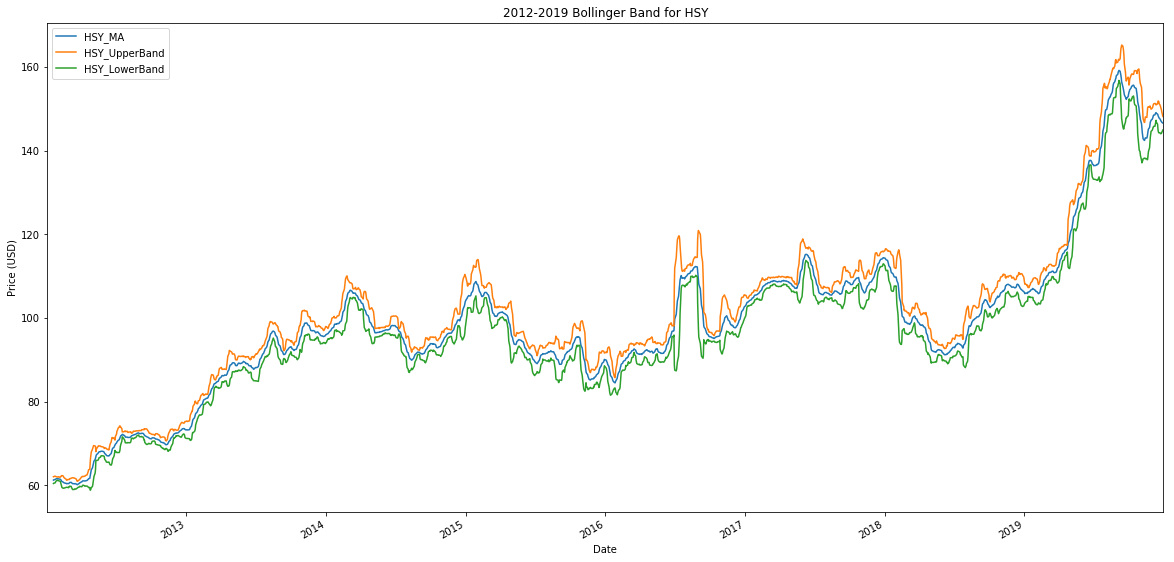

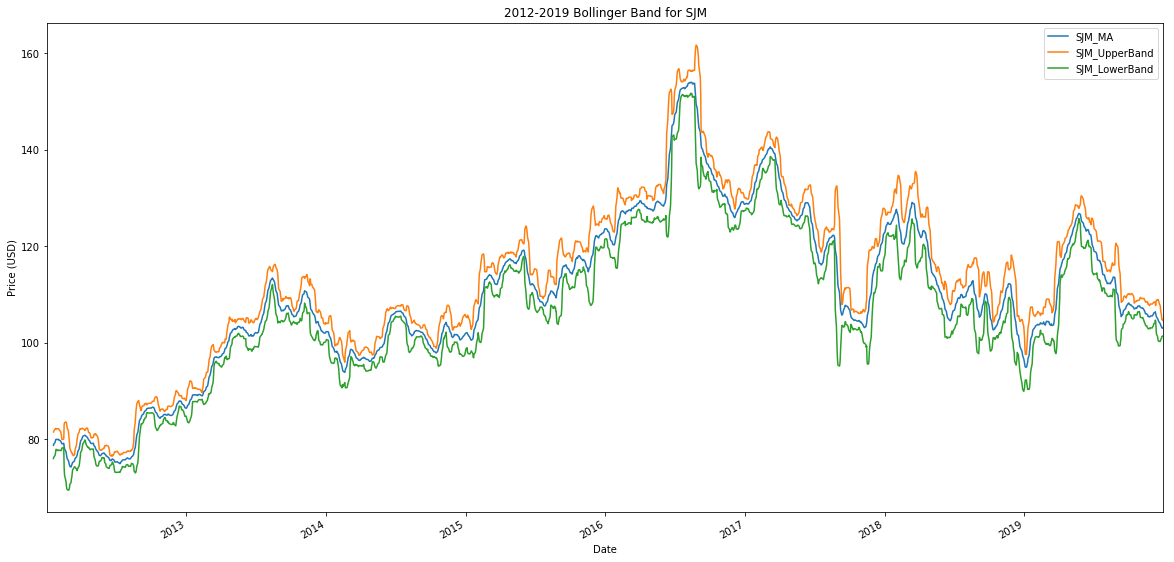

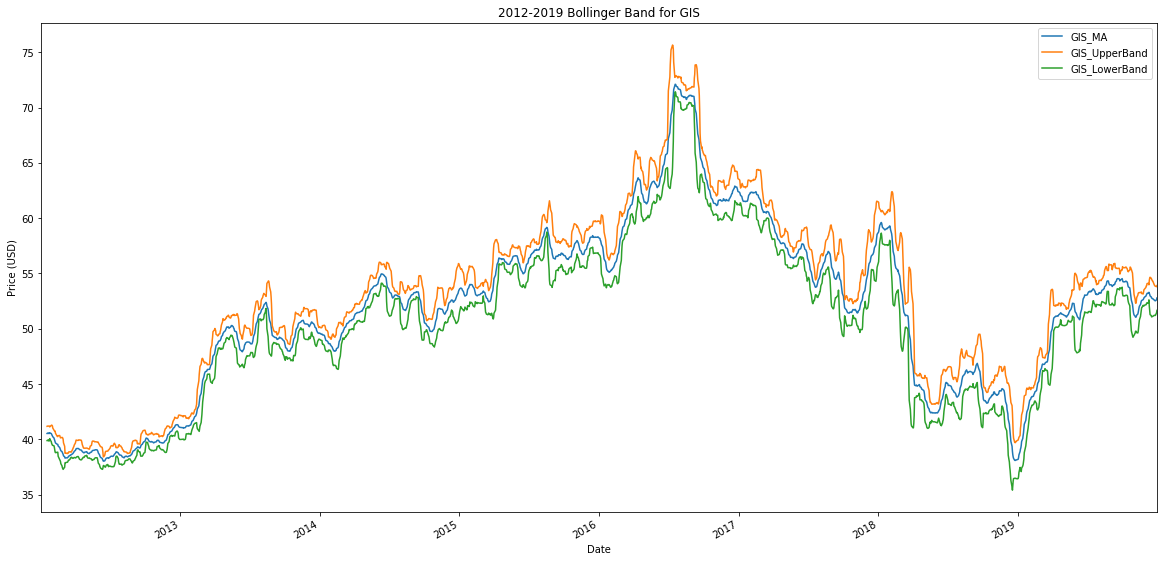

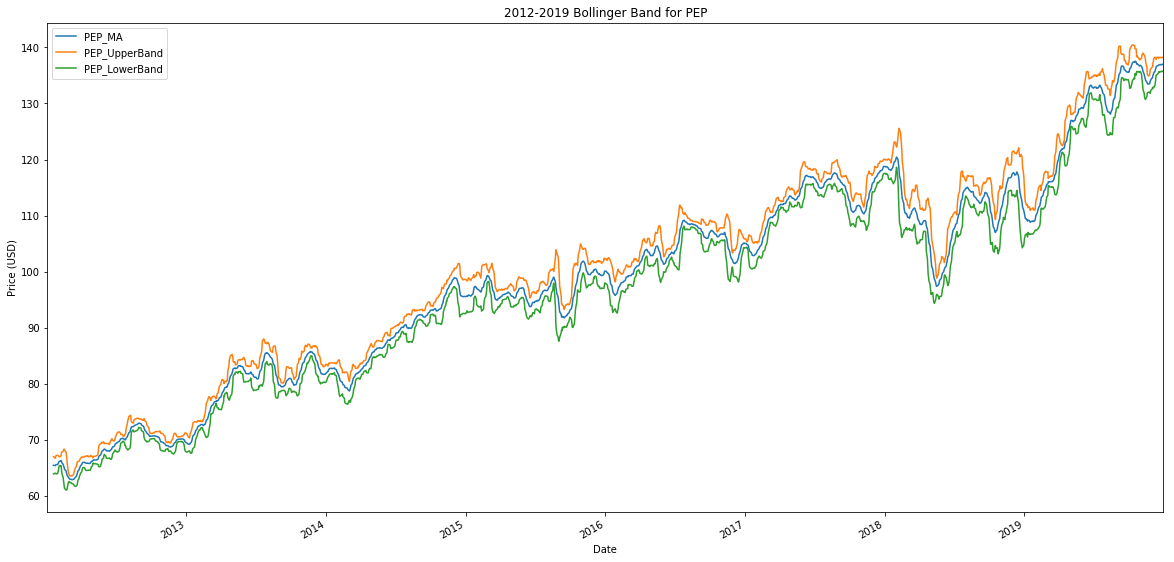

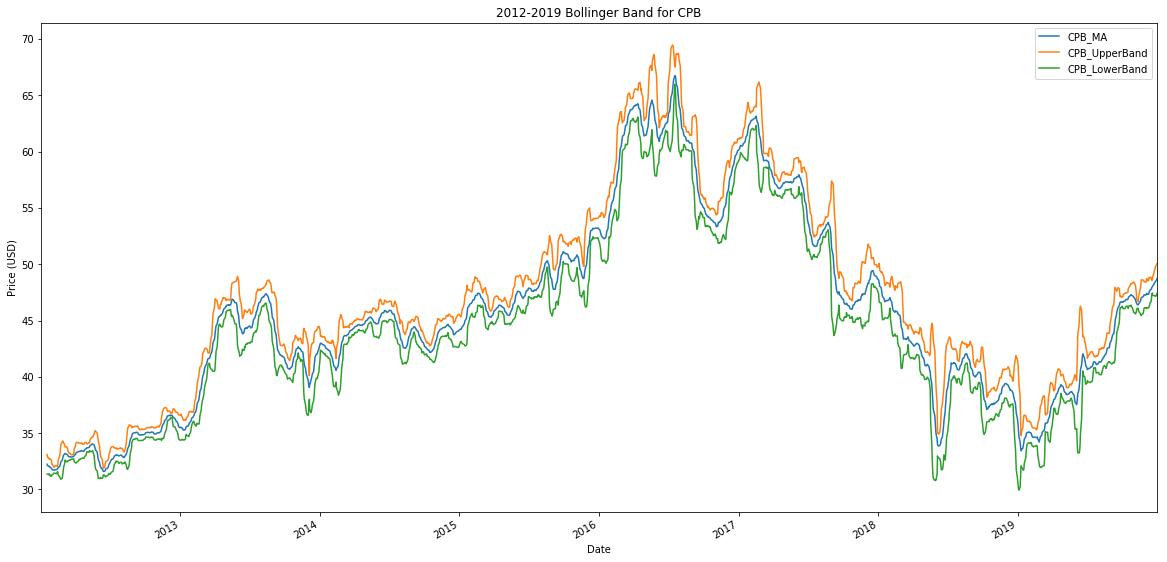

In [30]:
#HSY_Close-- LOW VOLATILITY
data['HSY_MA'] = data['HSY_Close'].rolling(12).mean()
data['HSY_STD'] = data['HSY_Close'].rolling(12).std() 
data['HSY_UpperBand'] = data['HSY_MA'] + (data['HSY_STD'] * 2)
data['HSY_LowerBand'] = data['HSY_MA'] - (data['HSY_STD'] * 2)
#Plot Bollinger Band
data[['HSY_MA', 'HSY_UpperBand', 'HSY_LowerBand']].plot(figsize=(20,10))
plt.title('2012-2019 Bollinger Band for HSY')
plt.ylabel('Price (USD)')
plt.show()

#SJM_Close-- LOW VOLATILITY
data['SJM_MA'] = data['SJM_Close'].rolling(12).mean()
data['SJM_STD'] = data['SJM_Close'].rolling(12).std() 
data['SJM_UpperBand'] = data['SJM_MA'] + (data['SJM_STD'] * 2)
data['SJM_LowerBand'] = data['SJM_MA'] - (data['SJM_STD'] * 2)
#Plot Bollinger Band
data[['SJM_MA', 'SJM_UpperBand', 'SJM_LowerBand']].plot(figsize=(20,10))
plt.title('2012-2019 Bollinger Band for SJM')
plt.ylabel('Price (USD)')
plt.show()

#GIS_Close-- LOW VOLATILITY
data['GIS_MA'] = data['GIS_Close'].rolling(12).mean()
data['GIS_STD'] = data['GIS_Close'].rolling(12).std() 
data['GIS_UpperBand'] = data['GIS_MA'] + (data['GIS_STD'] * 2)
data['GIS_LowerBand'] = data['GIS_MA'] - (data['GIS_STD'] * 2)
#Plot Bollinger Band
data[['GIS_MA', 'GIS_UpperBand', 'GIS_LowerBand']].plot(figsize=(20,10))
plt.title('2012-2019 Bollinger Band for GIS')
plt.ylabel('Price (USD)')
plt.show()

#PEP_Close-- LOW VOLATILITY
data['PEP_MA'] = data['PEP_Close'].rolling(12).mean()
data['PEP_STD'] = data['PEP_Close'].rolling(12).std() 
data['PEP_UpperBand'] = data['PEP_MA'] + (data['PEP_STD'] * 2)
data['PEP_LowerBand'] = data['PEP_MA'] - (data['PEP_STD'] * 2)
#Plot Bollinger Band
data[['PEP_MA', 'PEP_UpperBand', 'PEP_LowerBand']].plot(figsize=(20,10))
plt.title('2012-2019 Bollinger Band for PEP')
plt.ylabel('Price (USD)')
plt.show()

#CPB_Close-- LOW VOLATILITY
data['CPB_MA'] = data['CPB_Close'].rolling(12).mean()
data['CPB_STD'] = data['CPB_Close'].rolling(12).std() 
data['CPB_UpperBand'] = data['CPB_MA'] + (data['CPB_STD'] * 2)
data['CPB_LowerBand'] = data['CPB_MA'] - (data['CPB_STD'] * 2)
#Plot Bollinger Band
data[['CPB_MA', 'CPB_UpperBand', 'CPB_LowerBand']].plot(figsize=(20,10))
plt.title('2012-2019 Bollinger Band for CPB')
plt.ylabel('Price (USD)')
plt.show()

[**Maximum Drawdown (MDD)**](https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp)
- Another way of dealing with volatility is to find the maximum drawdown
- the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained
- Maximum drawdown is an indicator of downside risk over a specified time period
- expressed in percentage terms
- does loss just continue to increase???

In [ ]:
data['CORN_cum_return']
data['WEAT_cum_return'] 
data['CANE_cum_return'] 
data['HSY_cum_return']
data['SJM_cum_return']
data['GIS_cum_return'] 
data['PEP_cum_return']
data['CPB_cum_return']

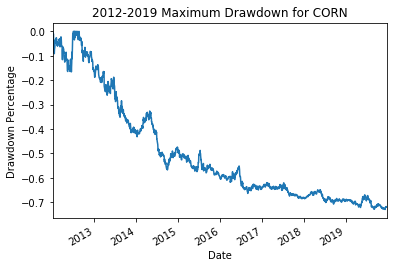

In [47]:
#take the stock cumulative return and put into formula with maximum cumulative return
#https://seekingalpha.com/instablog/42079636-kayode-omotosho/5377452-computing-maximum-drawdown-of-stocks-in-python
CORN_CumMax = data['CORN_cum_return'].cummax()
data['CORN_MaxDrawdown'] = ((data['CORN_cum_return']) - CORN_CumMax)/CORN_CumMax

plt.title('2012-2019 Maximum Drawdown for CORN')
plt.ylabel('Drawdown Percentage')
data['CORN_MaxDrawdown'].plot()

[**Beta**](https://www.investopedia.com/terms/b/beta.asp)
- A beta coefficient can measure the volatility of an individual stock compared to the systematic risk of the entire market. 
- In statistical terms, beta represents the slope of the line through a regression of data points. 
- In finance, each of these data points represents an individual stock's returns against those of the market as a whole.

In [10]:
#find the stdev of each stock close feature
stdev_CORN = data['CORN_Close'].std(axis=0)
print('Standard deviation of CORN_Close', stdev_CORN)
stdev_WEAT = data['WEAT_Close'].std(axis=0)
print('Standard deviation of WEAT_Close', stdev_WEAT)
stdev_CANE = data['CANE_Close'].std(axis=0)
print('Standard deviation of CANE_Close', stdev_CANE)
stdev_HSY = data['HSY_Close'].std(axis=0)
print('Standard deviation of HSY_Close', stdev_HSY)
stdev_SJM = data['SJM_Close'].std(axis=0)
print('Standard deviation of SJM_Close', stdev_SJM)
stdev_GIS = data['GIS_Close'].std(axis=0)
print('Standard deviation of GIS_Close', stdev_GIS)
stdev_PEP = data['PEP_Close'].std(axis=0)
print('Standard deviation of PEP_Close', stdev_PEP)
stdev_CPB = data['CPB_Close'].std(axis=0)
print('Standard deviation of CPB_Close', stdev_CPB)

Standard deviation of CORN_Close 10.123039196019285
Standard deviation of WEAT_Close 5.781548873023852
Standard deviation of CANE_Close 4.318318405796824
Standard deviation of HSY_Close 19.279814646539034
Standard deviation of SJM_Close 16.698707603109206
Standard deviation of GIS_Close 7.642143770388628
Standard deviation of PEP_Close 18.703147094504825
Standard deviation of CPB_Close 8.40422313765424


In [21]:
#find the stdev (volatility) of each stock return
#https://medium.com/@supriyo3.14/what-is-volatility-definition-how-to-use-it-in-trading-da4dfc296729)
stdev_CORN_return = data['CORN_return'].std(axis=0)
print('Standard deviation of CORN_return', stdev_CORN_return)

Standard deviation of CORN_return 0.012386117368388409


In [17]:
#STDEV of CORN_Close by year
data_CORN = data[['CORN_Close', 'Year']]
data_CORN2012 = data_CORN[(data_CORN.Year == 2012)]
data_CORN2013 = data_CORN[(data_CORN.Year == 2013)]
data_CORN2014 = data_CORN[(data_CORN.Year == 2014)]
data_CORN2015 = data_CORN[(data_CORN.Year == 2015)]
data_CORN2016 = data_CORN[(data_CORN.Year == 2016)]
data_CORN2017 = data_CORN[(data_CORN.Year == 2017)]
data_CORN2018 = data_CORN[(data_CORN.Year == 2018)]
data_CORN2019 = data_CORN[(data_CORN.Year == 2019)]

stdev_CORN2012 = data_CORN2012.std(axis=0)
print('2012',data_CORN2012)
stdev_CORN2013 = data_CORN2013.std(axis=0)
print('2013',data_CORN2013) 
stdev_CORN2014 = data_CORN2014.std(axis=0)
print('2014', data_CORN2014)
stdev_CORN2015 = data_CORN2015.std(axis=0)
print('2015', data_CORN2015)
stdev_CORN2016 = data_CORN2016.std(axis=0)
print('2016', data_CORN2016)
stdev_CORN2017 = data_CORN2017.std(axis=0)
print('2017',data_CORN2017)
stdev_CORN2018 = data_CORN2018.std(axis=0)
print('2018',data_CORN2018)
stdev_CORN2019 = data_CORN2019.std(axis=0)
print('2019',data_CORN2019)

2012             CORN_Close  Year
Date                        
2012-01-03       42.62  2012
2012-01-04       42.51  2012
2012-01-05       41.51  2012
2012-01-06       41.35  2012
2012-01-09       42.19  2012
...                ...   ...
2012-12-24       44.82  2012
2012-12-26       44.16  2012
2012-12-27       44.04  2012
2012-12-28       44.17  2012
2012-12-31       44.32  2012

[250 rows x 2 columns]
2013             CORN_Close  Year
Date                        
2013-01-02       43.66  2013
2013-01-03       43.44  2013
2013-01-04       42.77  2013
2013-01-07       42.92  2013
2013-01-08       43.20  2013
...                ...   ...
2013-12-24       31.49  2013
2013-12-26       31.05  2013
2013-12-27       30.95  2013
2013-12-30       30.71  2013
2013-12-31       30.58  2013

[252 rows x 2 columns]
2014             CORN_Close  Year
Date                        
2014-01-02       30.53  2014
2014-01-03       30.76  2014
2014-01-06       31.14  2014
2014-01-07       30.89  2014
2014-01-0

In [29]:
#Standard deviation of Close by year
#goal: compare to Temp_Anamoly per year

#STDEV of CORN_Close by year
data_CORN = data[['CORN_Close', 'Year']]
data_CORN2012 = data_CORN[(data_CORN.Year == 2012)]
data_CORN2013 = data_CORN[(data_CORN.Year == 2013)]
data_CORN2014 = data_CORN[(data_CORN.Year == 2014)]
data_CORN2015 = data_CORN[(data_CORN.Year == 2015)]
data_CORN2016 = data_CORN[(data_CORN.Year == 2016)]
data_CORN2017 = data_CORN[(data_CORN.Year == 2017)]
data_CORN2018 = data_CORN[(data_CORN.Year == 2018)]
data_CORN2019 = data_CORN[(data_CORN.Year == 2019)]

#STDEV of WEAT_Close by year
data_WEAT = data[['WEAT_Close', 'Year']]
data_WEAT2012 = data_WEAT[(data_WEAT.Year == 2012)]
data_WEAT2013 = data_WEAT[(data_WEAT.Year == 2013)]
data_WEAT2014 = data_WEAT[(data_WEAT.Year == 2014)]
data_WEAT2015 = data_WEAT[(data_WEAT.Year == 2015)]
data_WEAT2016 = data_WEAT[(data_WEAT.Year == 2016)]
data_WEAT2017 = data_WEAT[(data_WEAT.Year == 2017)]
data_WEAT2018 = data_WEAT[(data_WEAT.Year == 2018)]
data_WEAT2019 = data_WEAT[(data_WEAT.Year == 2019)]

#STDEV of CANE_Close by year
data_CANE = data[['CANE_Close', 'Year']]
data_CANE2012 = data_CANE[(data_CANE.Year == 2012)]
data_CANE2013 = data_CANE[(data_CANE.Year == 2013)]
data_CANE2014 = data_CANE[(data_CANE.Year == 2014)]
data_CANE2015 = data_CANE[(data_CANE.Year == 2015)]
data_CANE2016 = data_CANE[(data_CANE.Year == 2016)]
data_CANE2017 = data_CANE[(data_CANE.Year == 2017)]
data_CANE2018 = data_CANE[(data_CANE.Year == 2018)]
data_CANE2019 = data_CANE[(data_CANE.Year == 2019)]



In [30]:
#2012 stdev of all closing stock prices
stdev_CORN2012 = data_CORN2012.std(axis=0)
print('Standard deviation 2012', stdev_CORN2012)
stdev_WEAT2012 = data_WEAT2012.std(axis=0)
print('Standard deviation 2012', stdev_WEAT2012)
stdev_CANE2012 = data_CANE2012.std(axis=0)
print('Standard deviation 2012', stdev_CANE2012)

Standard deviation 2012 CORN_Close    5.045373
Year          0.000000
dtype: float64
Standard deviation 2012 WEAT_Close    1.84194
Year          0.00000
dtype: float64
Standard deviation 2012 CANE_Close    2.322888
Year          0.000000
dtype: float64


In [31]:
#2013 stdev of all closing stock prices
stdev_CORN2013 = data_CORN2013.std(axis=0)
print('Standard deviation 2013', stdev_CORN2013)
stdev_WEAT2013 = data_WEAT2013.std(axis=0)
print('Standard deviation 2013', stdev_WEAT2013)
stdev_CANE2013 = data_CANE2013.std(axis=0)
print('Standard deviation 2013', stdev_CANE2013)

Standard deviation 2013 CORN_Close    4.484403
Year          0.000000
dtype: float64
Standard deviation 2013 WEAT_Close    1.613443
Year          0.000000
dtype: float64
Standard deviation 2013 CANE_Close    1.022252
Year          0.000000
dtype: float64


In [32]:
#2014 stdev of all closing stock prices
stdev_CORN2014 = data_CORN2014.std(axis=0)
print('Standard deviation 2014', stdev_CORN2014)
stdev_WEAT2014 = data_WEAT2014.std(axis=0)
print('Standard deviation 2014', stdev_WEAT2014)
stdev_CANE2014 = data_CANE2014.std(axis=0)
print('Standard deviation 2014', stdev_CANE2014)

Standard deviation 2014 CORN_Close    3.672126
Year          0.000000
dtype: float64
Standard deviation 2014 WEAT_Close    1.777237
Year          0.000000
dtype: float64
Standard deviation 2014 CANE_Close    0.982802
Year          0.000000
dtype: float64


In [33]:
#2015 stdev of all closing stock prices
stdev_CORN2015 = data_CORN2015.std(axis=0)
print('Standard deviation 2015', stdev_CORN2015)
stdev_WEAT2015 = data_WEAT2015.std(axis=0)
print('Standard deviation 2015', stdev_WEAT2015)
stdev_CANE2015 = data_CANE2015.std(axis=0)
print('Standard deviation 2015', stdev_CANE2015)

Standard deviation 2015 CORN_Close    1.471404
Year          0.000000
dtype: float64
Standard deviation 2015 WEAT_Close    0.767365
Year          0.000000
dtype: float64
Standard deviation 2015 CANE_Close    1.102016
Year          0.000000
dtype: float64


In [ ]:
#2016 stdev of all closing stock prices
stdev_CORN2016 = data_CORN2016.std(axis=0)
print('Standard deviation 2016', stdev_CORN2016)
stdev_WEAT2016 = data_WEAT2016.std(axis=0)
print('Standard deviation 2016', stdev_WEAT2016)
stdev_CANE2016 = data_CANE2016.std(axis=0)
print('Standard deviation 2016', stdev_CANE2016)

In [ ]:
#2017 stdev of all closing stock prices
stdev_CORN2017 = data_CORN2017.std(axis=0)
print('Standard deviation 2017', stdev_CORN2017)
stdev_WEAT2017 = data_WEAT2017.std(axis=0)
print('Standard deviation 2017', stdev_WEAT2017)
stdev_CANE2017 = data_CANE2017.std(axis=0)
print('Standard deviation 2017', stdev_CANE2017)

In [ ]:
#2018 stdev of all closing stock prices
stdev_CORN2018 = data_CORN2018.std(axis=0)
print('Standard deviation 2018', stdev_CORN2018)
stdev_WEAT2018 = data_WEAT2018.std(axis=0)
print('Standard deviation 2018', stdev_WEAT2018)
stdev_CANE2018 = data_CANE2018.std(axis=0)
print('Standard deviation 2018', stdev_CANE2018)

In [ ]:
#2019 stdev of all closing stock prices
stdev_CORN2019 = data_CORN2019.std(axis=0)
print('Standard deviation 2019', stdev_CORN2019)
stdev_WEAT2019 = data_WEAT2019.std(axis=0)
print('Standard deviation 2019', stdev_WEAT2019)
stdev_CANE2019 = data_CANE2019.std(axis=0)
print('Standard deviation 2019', stdev_CANE2019)